<a href="https://colab.research.google.com/github/Diego-CB/Lista_1/blob/main/Lista_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio No.1
- Diego Cordova 20212
- Paola de León 20361
- Gabriela Contreras 20213

### EJERCICIO NO.1

**OpenCV**
- *Lectura de imagenes*
```
<!-- args: image file -->
image = cv2.imread("image_path.jpg")
```

- *Convertir img a array*
  - Abrir la imagen con cv2.imred retorna la imagen en un array de Numpy, cada valor del array corresponde a un pixel de la imagen.

- *Convertir de array a img*
```
bgr_img = cv2.cvtColor(array_imagen, cv2.COLOR_BGR2RGB)
```

- *Guardar imagenes a disco duro*
```
 <!-- args: img , file path  -->
 cv2.imwrite(file_path, img)
```

- *Almacenamiento de imagenes en memoria*
  -  las imágenes son matrices NumPy multidimensionales



**PIL**
- *Lectura de imagenes*
```
<!-- args: image path -->
image = Image.open("image.jpg")
```

- *Convertir img a array*
```
<!-- args: image file -->
numpy_array = np.array(img)
```

- *Convertir de array a img*
```
<!-- args: numpy_array -->
m = Image.fromarray(array)
```

- Almacenamiento de imagenes en memoria
  - las imagenes se pueden convertir a un Numpy array decuardo a las necesides del usuario

- *Guardar imagenes a disco duro*
```
<!-- args: Nombre y formato de salida -->
 new_image.save("image_1.jpg")
```






**Matplotlib**
- *Guardar imagenes a disco duro*
```
<!-- args: Nombre y formato de salida -->
plt.savefig("output.jpg")
```



## Ejercicio No. 2

## Ejercicio No. 3

In [9]:
! pip install opencv-python
! pip install numpy
! pip install matplotlib

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lectura de la imagen
img = cv2.imread("img.jpg")
img_G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convertir img a escala de grises

In [11]:
def HistNorm(img_G, title):
    hist,bins = np.histogram(img_G.flatten(),256,[0,256])
    plt.subplot(1, 2, 1)
    plt.hist(img_G.ravel(),256,[0,256], color= "steelblue")
    plt.title(title)
    plt.xlim([0,256])

    return hist

def DistAcum(hist, title):
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    plt.subplot(1, 2, 2)
    plt.plot(cdf_normalized, color= "darkorange")
    plt.xlim([0,256]) # se utiliza para establecer un limite eje x 
    plt.title(title)

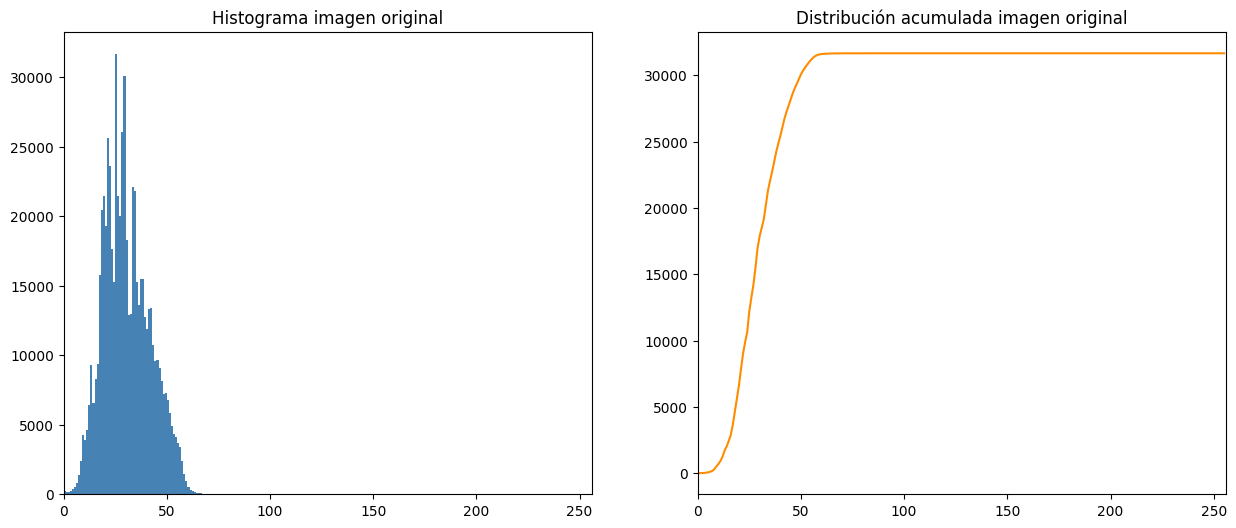

In [12]:
# Hitogramas de imagen original
plt.figure(figsize=(15, 6))
hist = HistNorm(img_G, "Histograma imagen original")
acum = DistAcum(hist, "Distribución acumulada imagen original")
plt.show()

In [13]:
# Equalización manual
cdf = []
contador = 0
histograma = [0] * 256  #Crear histograma con 256 elementos con el valor 0 

# Conteo de la frecuencia de cada pixel
for linea in img_G:
    for pixel in linea:
        histograma[pixel] += 1

# Distribución acumulada 
for elemento in histograma:
    contador += elemento
    cdf.append(contador)

cdf_minVal = min(cdf)

# Transformación de Equalización

cdf_Norm = [(x - cdf_minVal) * 255 / (cdf[-1] - cdf_minVal) for x in cdf]
equalizacion = [[cdf_Norm[i] for i in row] for row in img_G]
img_equalizada = np.array(equalizacion, dtype=np.uint8)

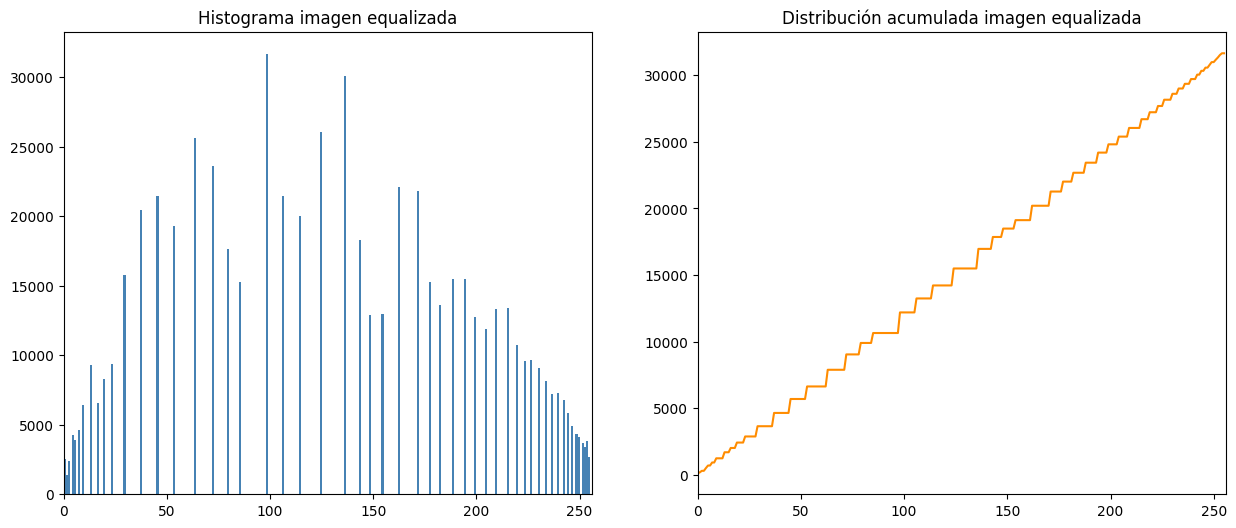

In [14]:
plt.figure(figsize=(15, 6))
hist = HistNorm(img_equalizada, "Histograma imagen equalizada")
acum = DistAcum(hist, "Distribución acumulada imagen equalizada")
plt.show()

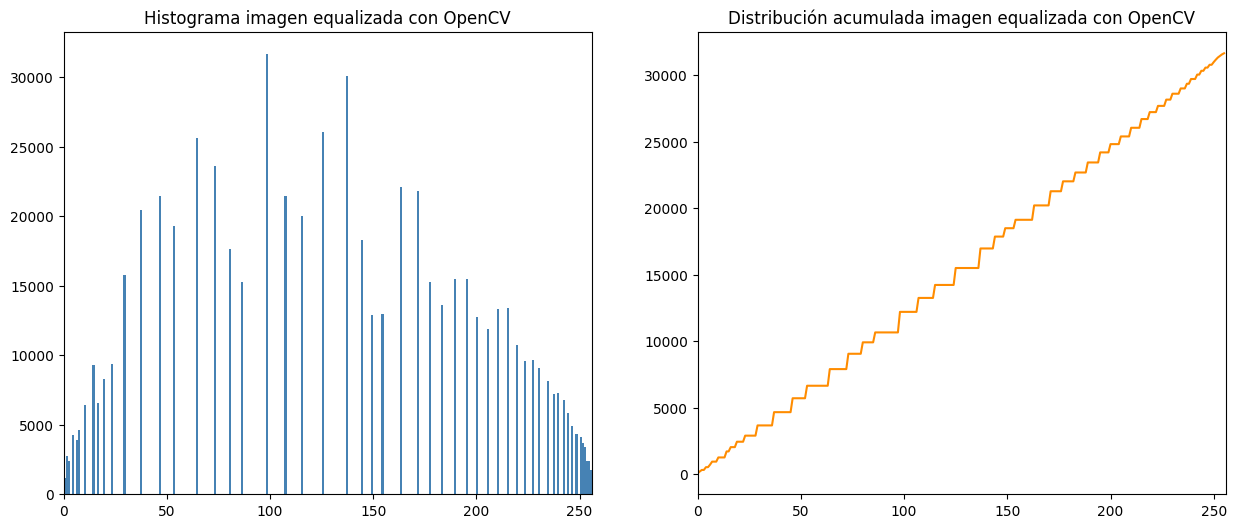

In [15]:
# Hitogramas de imagen con openCV
equalizeImg_cv2 = cv2.equalizeHist(img_G)

plt.figure(figsize=(15, 6))
hist = HistNorm(equalizeImg_cv2, "Histograma imagen equalizada con OpenCV")
acum = DistAcum(hist, "Distribución acumulada imagen equalizada con OpenCV")
plt.show()


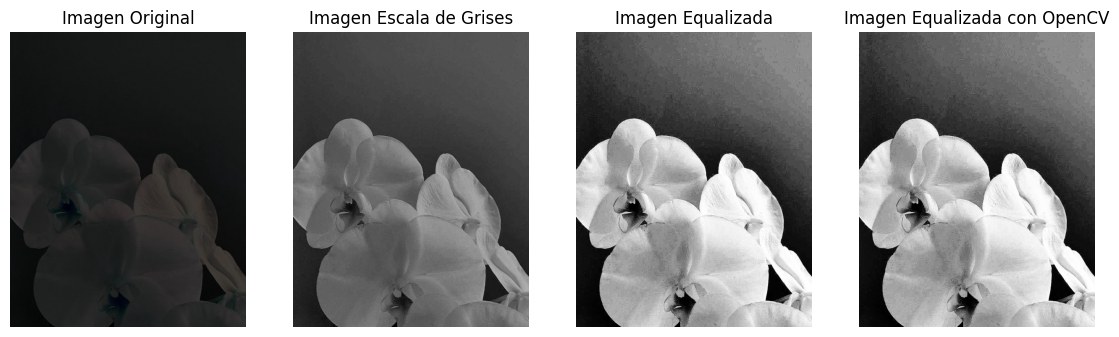

In [16]:
fig, axs = plt.subplots(1, 4, figsize=(14, 6))

axs[0].axis('off')
axs[0].set_title('Imagen Original')
axs[0].imshow(img)

axs[1].axis('off')
axs[ 1].set_title('Imagen Escala de Grises')
axs[1].imshow(img_G, cmap='gray')

axs[2].axis('off')
axs[2].set_title('Imagen Equalizada')
axs[2].imshow(equalizeImg_cv2, cmap='gray')

axs[3].axis('off')
axs[3].set_title('Imagen Equalizada con OpenCV')
axs[3].imshow(equalizeImg_cv2, cmap='gray')


¿Son iguales sus resultados con los de la función?
- En escencia la imagen equalizada de forma manual es muy similar a la de la funcion, no obstante en el fondo de la imagen que hace uso de la funcion  se puede ver como es que los tonos gris obscuro son más fuertes que en la imagen que no; esto tambien se pude ver reflejado en histograma pues al inico las barras se encuentran unidas en la imagen de la funcion y en la que no hace uso de esta las barras se encuentran más dispersas entre los numeros  0 y 50 

## Ejercicio No. 4

## Ejercicio No. 5

## Ejercicio No. 6